In [32]:
#!/usr/bin/env python

# JRK: from https://breakingcode.wordpress.com/2013/04/08/finding-connected-components-in-a-graph/

# Finding connected components in a bidirectional graph.
# By Mario Vilas (mvilas at gmail dot com)

import random
import string
import time
import numpy as np
import pickle
import sys

sys.setrecursionlimit(100000000)

# The graph nodes.
class Data(object):
    def __init__(self, name):
        self.__name  = name
        self.__links = set()

    @property
    def name(self):
        return self.__name

    @property
    def links(self):
        return set(self.__links)

    def add_link(self, other):
        self.__links.add(other)
        other.__links.add(self)

# The function to look for connected components.
def connected_components(nodes):

    # List of connected components found. The order is random.
    result = []

    # Make a copy of the set, so we can modify it.
    nodes = set(nodes)

    # Iterate while we still have nodes to process.
    while nodes:

        # Get a random node and remove it from the global set.
        n = nodes.pop()

        # This set will contain the next group of nodes connected to each other.
        group = {n}

        # Build a queue with this node in it.
        queue = [n]

        # Iterate the queue.
        # When it's empty, we finished visiting a group of connected nodes.
        while queue:

            # Consume the next item from the queue.
            n = queue.pop(0)

            # Fetch the neighbors.
            neighbors = n.links

            # Remove the neighbors we already visited.
            neighbors.difference_update(group)

            # Remove the remaining nodes from the global set.
            nodes.difference_update(neighbors)

            # Add them to the group of connected nodes.
            group.update(neighbors)

            # Add them to the queue, so we visit them in the next iterations.
            queue.extend(neighbors)

        # Add the group to the list of groups.
        result.append(group)

    # Return the list of groups.
    return result

# The test code...
if __name__ == "__main__":
    
    n_nodes = 1
    times_generate = {}
    times_solve = {}
    
    while True:
        try:
            graph = []
            n_nodes = n_nodes + n_nodes
            nodes = []
            name_length = 8
            probabiliy = 1.0 / n_nodes
    
            for i in range(n_nodes):
                hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
                graph.append(Data(hash))
                
            start_time = time.time()
            for i in range(n_nodes):
                for j in range(n_nodes):
                    if random.uniform(0.0, 1.0) < probabiliy:
                        graph[i].add_link(graph[j])
            stopped_time = time.time() - start_time
            
            print("Time to generate graph - nodes: " + str(n_nodes) + ":%s seconds" % stopped_time)
            times_generate[n_nodes] = stopped_time
            
            with open('connected_graph_' + str(n_nodes) + '.pkl', 'wb') as output:
                pickle.dump(graph, output, pickle.HIGHEST_PROTOCOL)
            
            # with open('connected_graph_1024.pkl', 'rb') as input:
            #     graph = pickle.load(input)
        
            # Find all the connected components.
            number = 1
            start_time = time.time()
            for components in connected_components(graph):
                names = sorted(node.name for node in components)
                names = ", ".join(names)
                # print("Group #%i: %s" % (number, names))
                number += 1
            stopped_time = time.time() - start_time
            
            print("Time to solve graph - nodes: " + str(n_nodes) + ":%s seconds" % stopped_time)
            times_solve[n_nodes] = stopped_time
                
        except KeyboardInterrupt:
            break

Time to generate graph - nodes: 2048:1.8120269775390625 seconds
Group #1: 0037QCOP, 00CEYEV1, 0195NEX5, 02PU3MN3, 03BCATIQ, 03C6QSTW, 03ZZ023Z, 049R98J2, 04JGR3HB, 05WB8PJR, 064SP5HZ, 06J9TCZ3, 07M5QOGA, 083WQFID, 09QSIJIR, 09TBVFJM, 09ZDCHZR, 0AZXK7DP, 0B9CSXJO, 0CP9N8DI, 0CROT3SM, 0FWEFJ5E, 0H6L3LO0, 0IR5F6RJ, 0IS3X7ZP, 0JTJQXCO, 0JW5EQLV, 0JX06C07, 0LE0H7B5, 0NM9TG3J, 0P6S7M8N, 0Q22HRJU, 0Q5YV4A1, 0QR8YOLO, 0QWDS2C7, 0QXDXB6T, 0TJH76CM, 0UONVA6B, 0W9MU55Q, 0WII3DXX, 0YBRGQKN, 0YQYH975, 11C0QGTV, 13MI8K37, 13QQTQSD, 147PT5FT, 14GMIXE4, 15BX32HL, 15CNSJZO, 15MBLKY7, 16X5KGS0, 18ABAZO6, 18ZQDO0E, 1AY280VJ, 1BUERD3F, 1CF04A9I, 1DEOUMW3, 1DS4RWMQ, 1DVLOGX1, 1FRJXY7R, 1HIL4JM7, 1J9QENK4, 1K6QPLUH, 1KGZW6KV, 1KW9942P, 1LJO6DMF, 1LK8GT1Y, 1M67KV25, 1MR3JS2W, 1P87XPP6, 1PLTFGZV, 1PND1KC3, 1QCETG3P, 1RMJJXYH, 1RWDNOSJ, 1S0H6H3V, 1S4456B3, 1SU68IM7, 1TPGFQEV, 1U1HU0GW, 1U1KEP4N, 1UBO7XFA, 1VDT55AF, 1WAD08MK, 1WKWOCF1, 1X5MMFSU, 1YUEZ9AH, 23TGW8D3, 25H4XHPP, 266TAXYD, 26IXKKHQ, 26XRUL6N, 271Z35

In [16]:
print(times_generate)
print(times_solve)

{4000: 16.10498285293579, 6000: 38.81223678588867, 2500: 6.146842956542969, 7500: 66.11489605903625, 8500: 84.83513498306274, 5000: 26.662800788879395, 1500: 2.2366039752960205, 3500: 12.336535930633545, 8000: 71.80939483642578, 2000: 3.9081850051879883, 1000: 0.9071259498596191, 4500: 21.34692406654358, 7000: 55.81980299949646, 3000: 9.14967393875122, 6500: 48.24269890785217, 5500: 34.470104932785034}
{4000: 0.6112651824951172, 6000: 1.652324914932251, 2500: 0.25202083587646484, 7500: 4.210410833358765, 8500: 5.847959995269775, 5000: 0.9324350357055664, 1500: 0.09363102912902832, 3500: 0.49626898765563965, 8000: 2.9120230674743652, 2000: 0.18606996536254883, 1000: 0.041613101959228516, 4500: 0.880669116973877, 7000: 3.1557469367980957, 3000: 0.38900089263916016, 6500: 2.380173921585083, 5500: 1.29899001121521}


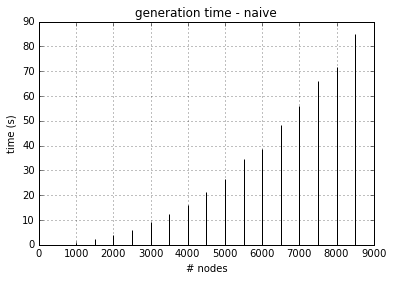

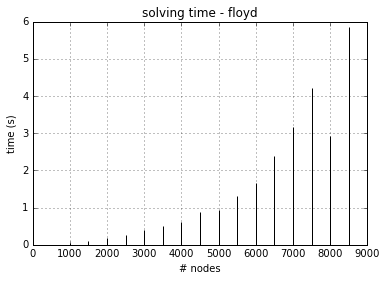

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(times_generate.keys()), times_generate.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('generation time')
plt.grid(True)
plt.show()

plt.bar(list(times_solve.keys()), times_solve.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('solving time')
plt.grid(True)
plt.show()